In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
plt.style.use('ggplot')

hollows_craters = pd.read_csv('D:\MJCJ research\Edge_detection\hollinCRAT.csv', usecols=["Diam_km1", "x_coord","y_coord",'Area_km2','Central_La', 'Central_Lo', 'Geodesic_a',"Join_Count"])
crater_dist = pd.read_excel('D:\MJCJ research\Edge_detection\MercLargeCrats_Select.xlsx', usecols=['Diam_km.1','x_coord','y_coord','Area_km2',"OID"])
hollows_craters_mod = pd.read_csv('D:\MJCJ research\Edge_detection\hollinCRAT_mod.csv', usecols=["Diam_km1", "x_coord","y_coord",'Area_km2','Central_La', 'Central_Lo', 'Geodesic_a'])

# Print some stats:
# print(hollows_craters.describe())

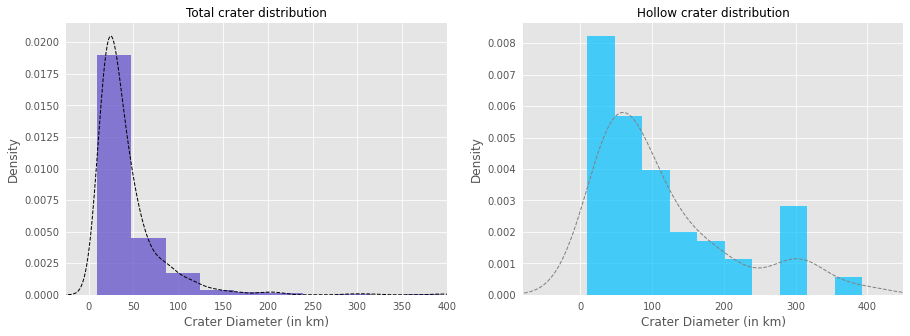

In [3]:
# Crater distribution in the inset
rounds = crater_dist['Diam_km.1'].round(decimals = 0)
rounded = hollows_craters_mod["Diam_km1"].round(decimals = 0)

fig = plt.figure(figsize = (15,5))

ax_1 = fig.add_subplot(1, 2, 1)

plt.hist(rounds, density = True, alpha = 0.8, color = 'slateblue')
plt.xlabel('Crater Diameter (in km)', fontsize=12)
plt.title('Total crater distribution', color = 'black', fontsize=12)

rounds.plot(kind = "kde", linewidth=1, linestyle='--', color = 'black')
ax_1.set_xlim(-25,400)

ax_2 = fig.add_subplot(1,2,2)

plt.hist(rounded, density = True, alpha = 0.7, color='deepskyblue')
plt.xlabel('Crater Diameter (in km)', fontsize=12)
plt.title('Hollow crater distribution', color = 'black', fontsize=12)

rounded.plot(kind = "kde",linewidth=1, linestyle='--', color = 'grey')
ax_2.set_xlim(-80,450)

# Turn off ticks and spines
ax_1.tick_params(left = False, bottom = False)
for ax_1, spine in ax_1.spines.items():
    spine.set_visible(False)
ax_2.tick_params(left = False, bottom = False)
for ax_2, spine in ax_2.spines.items():
    spine.set_visible(False)

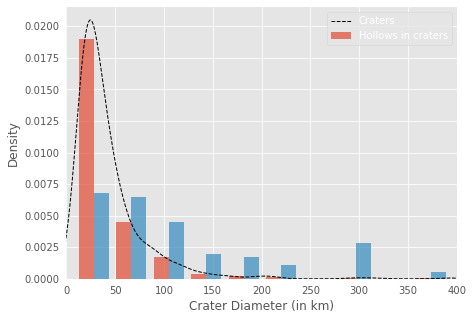

In [4]:
# Hollow inside craters for the chosen inset
fig2, ax2 = plt.subplots(figsize = (7,5))

plt.hist([rounds, rounded], density = True, alpha = 0.7, label = ['Craters','Hollows in craters'])
plt.legend(labelcolor='black')
plt.xlabel('Crater Diameter (in km)', fontsize=12)
plt.ylabel('Density')
ax2.set_xlim(0,400)
rounds.plot(kind = "kde", linewidth=1, linestyle='--', color = 'black')

# Turn off ticks and spines
ax2.tick_params(left = False, bottom = False)
for ax2, spine in ax2.spines.items():
    spine.set_visible(False)

Text(0.5, 1.0, 'Crater size VS Hollow count')

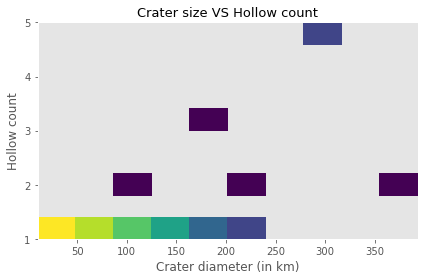

In [5]:
# Try a 2D plot for fun
fig3, ax = plt.subplots(tight_layout=True)

hist = ax.hist2d(hollows_craters["Diam_km1"], hollows_craters["Join_Count"], density = True, norm = colors.LogNorm())
ax.set_yticks([1,2,3,4,5])
ax.set_xlabel('Crater diameter (in km)')
ax.set_ylabel('Hollow count')
plt.title('Crater size VS Hollow count', color = 'black', fontsize=13)

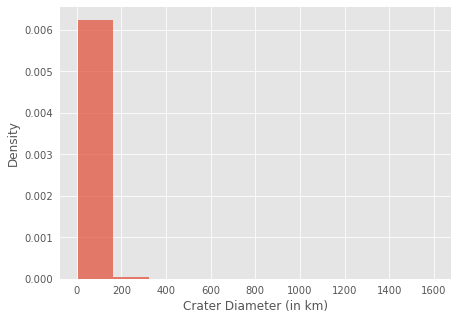

In [46]:
# Let's see if correcting for crater size distribution changes anything

# 1. Global distribution of craters d > 5km

craters_10km_up = pd.read_excel('D:\MJCJ research\Edge_detection\craters_over_10_km_in_diameter_2017.xlsx', usecols = ["lat", "lon", "diam"])
craters_5_10km = pd.read_excel('D:\MJCJ research\Edge_detection\craters_5-10_km_2017.xlsx', usecols = ["lat", "lon", "diam"])

# 1.1 Append both dataframes

craters_5km_up = craters_10km_up.append(craters_5_10km)

fig3, ax3 = plt.subplots(figsize = (7,5))

plt.hist(craters_5km_up["diam"], density = True, alpha = 0.7)
#plt.legend(labelcolor='black')
plt.xlabel('Crater Diameter (in km)', fontsize=12)
plt.ylabel('Density')
#ax3.set_xlim(0,200)
#craters_10km_up["diam"].plot(kind = "kde", linewidth=1, linestyle='--', color = 'black')

# Turn off ticks and spines
ax3.tick_params(left = False, bottom = False)
for ax3, spine in ax3.spines.items():
    spine.set_visible(False)

In [52]:
# Select craters in the inset only

square = craters_5km_up.loc[(craters_5km_up['lat'] < 36.682) & (craters_5km_up['lat'] > - 11.572) & (craters_5km_up['lon'] < -21.376) & (craters_5km_up['lon'] > - 74.771)]

# export to csv and do GIS magic
square_csv = square.to_csv('square.csv', index = True)

# GIS magic not working yet

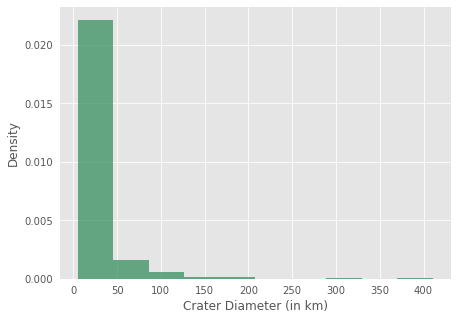

In [54]:
fig4, ax4 = plt.subplots(figsize = (7,5))

plt.hist(square["diam"], density = True, color = 'seagreen', alpha = 0.7)
#plt.legend(labelcolor='black')
plt.xlabel('Crater Diameter (in km)', fontsize=12)
plt.ylabel('Density')
#ax3.set_xlim(0,200)
#craters_10km_up["diam"].plot(kind = "kde", linewidth=1, linestyle='--', color = 'black')

# Turn off ticks and spines
ax4.tick_params(left = False, bottom = False)
for ax4, spine in ax4.spines.items():
    spine.set_visible(False)